# Mean-Semivariance Model

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
plt.style.use('ggplot')

In [2]:
stocks = ['BRITANNIA.NS', 'HINDUNILVR.NS', 'INFY.NS', 'MARUTI.NS', 'RELIANCE.NS', 'TATAMOTORS.NS', 'SUNPHARMA.NS',
          'ONGC.NS', 'BPCL.NS', 'TATASTEEL.NS']

In [3]:
df = yf.download(' '.join(stocks), start = '2022-01-01', end = '2022-02-01')

[*********************100%***********************]  10 of 10 completed


In [4]:
close =  df['Close']
close

,BPCL.NS,BRITANNIA.NS,HINDUNILVR.NS,INFY.NS,MARUTI.NS,ONGC.NS,RELIANCE.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS
Date,,,,,,,,,,
2022-01-03,386.100006,3617.550049,2361.300049,1898.449951,7523.899902,143.050003,2403.850098,848.950012,497.600006,1142.449951
2022-01-04,385.950012,3638.449951,2401.250000,1899.150024,7630.100098,147.800003,2458.100098,837.700012,489.600006,1148.800049
2022-01-05,394.700012,3659.699951,2415.800049,1844.650024,7775.350098,150.350006,2469.600098,835.099976,489.750000,1177.599976
2022-01-06,395.799988,3675.100098,2391.399902,1817.800049,7882.100098,150.800003,2416.500000,829.599976,488.850006,1163.250000
2022-01-07,396.200012,3737.350098,2416.149902,1814.300049,7906.000000,157.050003,2436.000000,828.950012,490.600006,1160.349976
2022-01-10,397.549988,3768.300049,2407.050049,1850.750000,8125.600098,158.350006,2438.000000,826.700012,503.700012,1169.050049
2022-01-11,391.149994,3743.350098,2403.649902,1855.599976,8143.850098,160.949997,2455.550049,832.400024,501.299988,1130.250000
2022-01-12,388.700012,3700.199951,2413.149902,1877.449951,8170.750000,164.949997,2521.100098,836.200012,507.250000,1147.199951
2022-01-13,394.500000,3749.050049,2414.199951,1896.800049,8077.049805,163.949997,2535.300049,865.500000,511.950012,1221.150024


In [5]:
lagged = close.shift(1)
returns = (close - lagged) / lagged
returns.dropna(axis = 0, inplace = True)

In [6]:
returns

,BPCL.NS,BRITANNIA.NS,HINDUNILVR.NS,INFY.NS,MARUTI.NS,ONGC.NS,RELIANCE.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS
Date,,,,,,,,,,
2022-01-04,-0.000388,0.005777,0.016919,0.000369,0.014115,0.033205,0.022568,-0.013252,-0.016077,0.005558
2022-01-05,0.022671,0.005840,0.006059,-0.028697,0.019036,0.017253,0.004678,-0.003104,0.000306,0.025070
2022-01-06,0.002787,0.004208,-0.010100,-0.014556,0.013729,0.002993,-0.021501,-0.006586,-0.001838,-0.012186
2022-01-07,0.001011,0.016938,0.010350,-0.001925,0.003032,0.041446,0.008070,-0.000783,0.003580,-0.002493
2022-01-10,0.003407,0.008281,-0.003766,0.020090,0.027776,0.008278,0.000821,-0.002714,0.026702,0.007498
2022-01-11,-0.016099,-0.006621,-0.001413,0.002621,0.002246,0.016419,0.007199,0.006895,-0.004765,-0.033189
2022-01-12,-0.006264,-0.011527,0.003952,0.011775,0.003303,0.024852,0.026695,0.004565,0.011869,0.014997
2022-01-13,0.014922,0.013202,0.000435,0.010307,-0.011468,-0.006062,0.005632,0.035039,0.009266,0.064461
2022-01-14,0.010013,-0.009869,-0.020918,0.017160,0.000885,-0.017688,0.001459,-0.006644,-0.004004,-0.006183


In [7]:
#Function to compute var-cov and semi var-cov matrix
def cov_matrix(df, avg, semi = False):
    temp = df - avg
    if semi:
        temp[temp < 0] = 0
    cov = np.matmul(temp.values.T, temp.values)/len(temp)
    return pd.DataFrame(cov, columns = temp.columns, index = temp.columns)

In [8]:
avg_returns = returns.mean()
var_cov_matrix = cov_matrix(returns, avg_returns)

In [9]:
var_cov_matrix

,BPCL.NS,BRITANNIA.NS,HINDUNILVR.NS,INFY.NS,MARUTI.NS,ONGC.NS,RELIANCE.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS
BPCL.NS,0.000248,0.000078,0.000014,0.000122,0.000110,0.000024,0.000091,0.000084,0.000228,0.000243
BRITANNIA.NS,0.000078,0.000123,0.000065,0.000052,0.000050,-0.000006,0.000065,0.000037,0.000072,0.000146
HINDUNILVR.NS,0.000014,0.000065,0.000204,0.000035,0.000132,0.000034,0.000109,0.000021,0.000021,0.000066
INFY.NS,0.000122,0.000052,0.000035,0.000307,-0.000033,0.000042,0.000172,0.000099,0.000193,0.000148
MARUTI.NS,0.000110,0.000050,0.000132,-0.000033,0.000529,0.000022,0.000060,-0.000031,0.000230,0.000130
ONGC.NS,0.000024,-0.000006,0.000034,0.000042,0.000022,0.000361,0.000129,0.000017,0.000142,0.000079
RELIANCE.NS,0.000091,0.000065,0.000109,0.000172,0.000060,0.000129,0.000245,0.000057,0.000175,0.000218
SUNPHARMA.NS,0.000084,0.000037,0.000021,0.000099,-0.000031,0.000017,0.000057,0.000162,0.000112,0.000158
TATAMOTORS.NS,0.000228,0.000072,0.000021,0.000193,0.000230,0.000142,0.000175,0.000112,0.000451,0.000334
TATASTEEL.NS,0.000243,0.000146,0.000066,0.000148,0.000130,0.000079,0.000218,0.000158,0.000334,0.000655


In [10]:
#Model
def optimize(desired_return, cov_matrix):
    mdl = Model()
    w = {(i): mdl.continuous_var(name = f'w_{i}', lb = 0, ub = 1) for i in returns.columns} # Decision Vars
    w_vector = np.array(list(w.values()))
    mdl.minimize(np.matmul(np.matmul(w_vector.T, cov_matrix), w_vector)) # Objective Function
    mdl.add_constraint(mdl.sum(w[i] for i in returns.columns) == 1) # Sum of all weights == 1
    if desired_return:
        mdl.add_constraint(mdl.sum(np.matmul(avg_returns.values, w_vector)) >= desired_return) # wi.E[Ri]>=R0
    solution = mdl.solve()
    decision_vars = solution.get_value_dict(w, precision=1e-25)
    return np.array(list(decision_vars.values())), solution.objective_value

In [11]:
portfolios_var, weights_var, portfolios_semi_var, weights_semi_var = [], [], [], []

In [12]:
#Desired Return
for n_portfolio, desired_return in enumerate(np.linspace(1e-3, avg_returns.max(), 10)):
    decision_vars, obj = optimize(desired_return, var_cov_matrix)
    actual_return = np.matmul(decision_vars, avg_returns)
    portfolios_var.append([np.sqrt(obj), actual_return])
    
    decision_vars = decision_vars.tolist()
    decision_vars.extend([obj, actual_return])
    weights_var.append(decision_vars)
    
    semi_var_cov_matrix =  cov_matrix(returns, desired_return, True)
    decision_vars, obj = optimize(desired_return, semi_var_cov_matrix)
    actual_return = np.matmul(decision_vars, avg_returns)
    portfolios_semi_var.append([np.sqrt(obj), actual_return])

    decision_vars = decision_vars.tolist()
    decision_vars.extend([obj, actual_return])
    weights_semi_var.append(decision_vars)

In [13]:
cols = list(returns.columns)
cols.extend(['Variance', 'Return'])

In [14]:
var_df = pd.DataFrame(weights_var, columns = cols)
semi_var_df = pd.DataFrame(weights_semi_var, columns = cols)

In [15]:
ind = [f'Portfolio {i}' for i in range(1,11)]
var_df.index = ind
semi_var_df.index = ind

In [16]:
#Global Minimum Variance
decision_vars, obj = optimize(False, var_cov_matrix)
actual_return = np.matmul(decision_vars,avg_returns)
gmv_var = [np.sqrt(obj), actual_return]
var_df.loc['GMV', :] = np.append(decision_vars, [obj, actual_return])
semi_var_cov_matrix =  cov_matrix(returns, 0, True)
decision_vars, obj = optimize(False, semi_var_cov_matrix)
actual_return = np.matmul(decision_vars,avg_returns)
gmv_semi_var = [np.sqrt(obj), actual_return]
semi_var_df.loc['GMSV', :] = np.append(decision_vars, [obj, actual_return])

In [17]:
np.round(var_df, 6)

,BPCL.NS,BRITANNIA.NS,HINDUNILVR.NS,INFY.NS,MARUTI.NS,ONGC.NS,RELIANCE.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,Variance,Return
Portfolio 1,0.000019,0.350527,0.094407,0.036329,0.078996,0.154587,0.000006,0.285126,0.000002,0.000001,0.000065,0.001161
Portfolio 2,0.000004,0.345375,0.052591,0.007727,0.104963,0.199264,0.000001,0.290074,0.000000,0.000000,0.000066,0.002012
Portfolio 3,0.000004,0.323995,0.000060,0.000002,0.141298,0.256477,0.000001,0.278161,0.000000,0.000000,0.000072,0.003025
Portfolio 4,0.000011,0.255643,0.000001,0.000001,0.173996,0.322717,0.000000,0.247631,0.000000,0.000000,0.000082,0.004037
Portfolio 5,0.005247,0.185578,0.000001,0.000000,0.205591,0.388575,0.000000,0.215007,0.000000,0.000000,0.000099,0.005049
Portfolio 6,0.020687,0.112265,0.000000,0.000000,0.235045,0.453670,0.000000,0.178331,0.000000,0.000000,0.000121,0.006062
Portfolio 7,0.036199,0.038932,0.000001,0.000001,0.264483,0.518761,0.000001,0.141622,0.000000,0.000000,0.000149,0.007074
Portfolio 8,0.039566,0.000002,0.000000,0.000000,0.291251,0.589547,0.000000,0.079633,0.000000,0.000000,0.000184,0.008086
Portfolio 9,0.014075,0.000004,0.000001,0.000001,0.317664,0.668139,0.000001,0.000114,0.000001,0.000001,0.000225,0.009099
Portfolio 10,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000361,0.010111


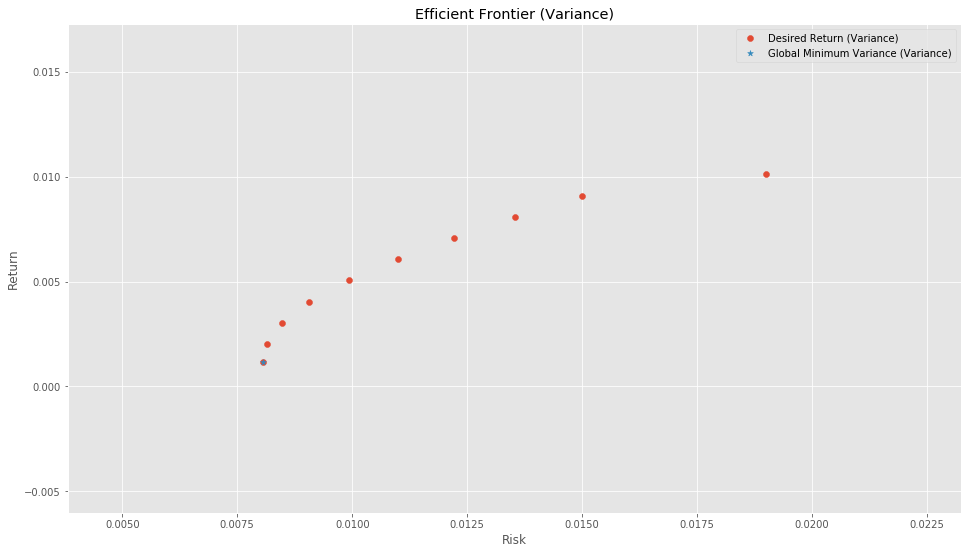

In [18]:
plt.figure(figsize = (16, 9))
plt.scatter([x[0] for x in portfolios_var], [x[1] for x in portfolios_var], label = 'Desired Return (Variance)')
plt.scatter(gmv_var[0], gmv_var[1], marker = '*', label = 'Global Minimum Variance (Variance)')
plt.title('Efficient Frontier (Variance)')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()

In [19]:
np.round(semi_var_df, 6)

,BPCL.NS,BRITANNIA.NS,HINDUNILVR.NS,INFY.NS,MARUTI.NS,ONGC.NS,RELIANCE.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,Variance,Return
Portfolio 1,0.015186,0.571793,0.000004,0.000001,0.102998,0.098766,0.096593,0.114658,0.000001,0.000000,0.000047,0.001000
Portfolio 2,0.033985,0.530101,0.000023,0.000008,0.128610,0.170565,0.026305,0.110387,0.000011,0.000005,0.000051,0.002012
Portfolio 3,0.038380,0.458444,0.000001,0.000000,0.161344,0.237074,0.000006,0.104750,0.000001,0.000000,0.000057,0.003025
Portfolio 4,0.035248,0.363402,0.000001,0.000000,0.193902,0.303325,0.000002,0.104119,0.000001,0.000000,0.000065,0.004037
Portfolio 5,0.035058,0.258187,0.000001,0.000000,0.221898,0.372014,0.000002,0.112839,0.000001,0.000000,0.000076,0.005049
Portfolio 6,0.027842,0.150175,0.000008,0.000005,0.250421,0.441784,0.000023,0.129730,0.000008,0.000005,0.000087,0.006062
Portfolio 7,0.017476,0.021015,0.000006,0.000003,0.279406,0.511277,0.000017,0.170790,0.000006,0.000004,0.000099,0.007074
Portfolio 8,0.000139,0.000023,0.000003,0.000002,0.311688,0.583078,0.000008,0.105053,0.000004,0.000003,0.000111,0.008086
Portfolio 9,0.000004,0.000002,0.000001,0.000000,0.337830,0.656259,0.000001,0.005902,0.000001,0.000001,0.000123,0.009099
Portfolio 10,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000173,0.010111


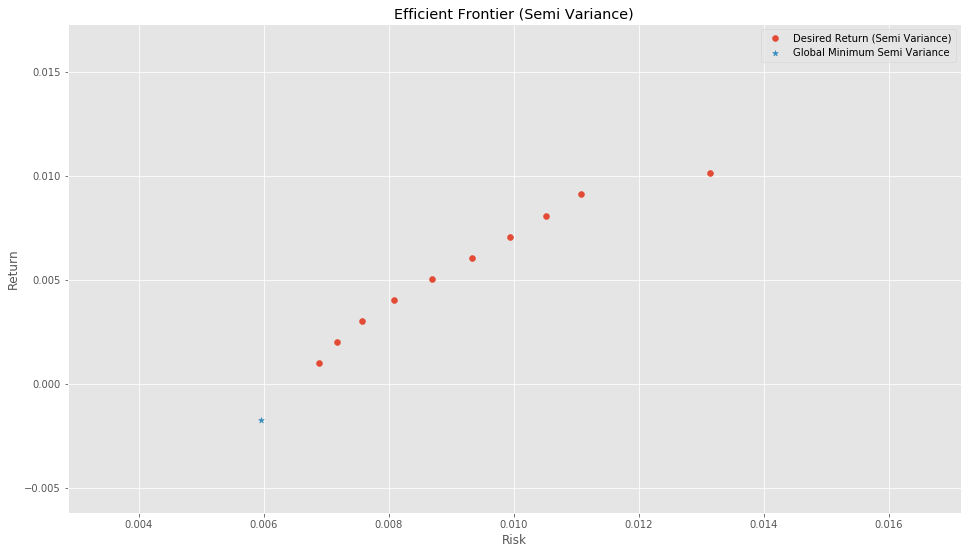

In [20]:
plt.figure(figsize = (16, 9))
plt.scatter([x[0] for x in portfolios_semi_var], [x[1] for x in portfolios_semi_var], label = 'Desired Return (Semi Variance)')
plt.scatter(gmv_semi_var[0], gmv_semi_var[1], marker = '*', label = 'Global Minimum Semi Variance')
plt.title('Efficient Frontier (Semi Variance)')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()

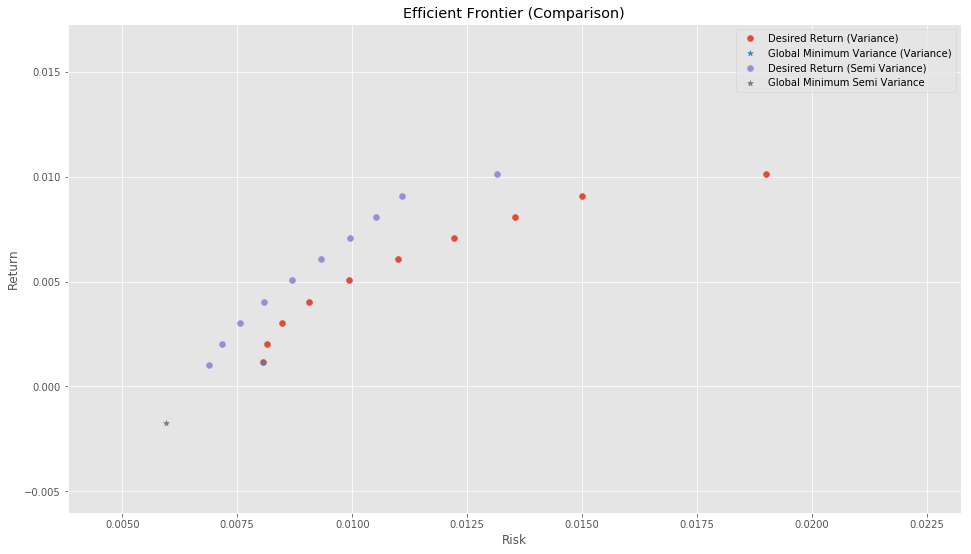

In [21]:
#Efficient Frontier Plot
plt.figure(figsize = (16, 9))
plt.scatter([x[0] for x in portfolios_var], [x[1] for x in portfolios_var], label = 'Desired Return (Variance)')
plt.scatter(gmv_var[0], gmv_var[1], marker = '*', label = 'Global Minimum Variance (Variance)')
plt.scatter([x[0] for x in portfolios_semi_var], [x[1] for x in portfolios_semi_var], label = 'Desired Return (Semi Variance)')
plt.scatter(gmv_semi_var[0], gmv_semi_var[1], marker = '*', label = 'Global Minimum Semi Variance')
plt.title('Efficient Frontier (Comparison)')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()

<hr>